# Singapore  Resale Flat Prices Predicting


# 1. Data Collection and Preprocessing

# IMPORTING MODULE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import requests 
import json
import glob
import warnings
warnings.filterwarnings('ignore')

# Loading the datasets

In [2]:
csv_paths = [
    "/Users/mulakapranathi/Downloads/ResaleFlatPricesBasedonApprovalDate19901999.csv",
    "/Users/mulakapranathi/Downloads/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv",
    "/Users/mulakapranathi/Downloads/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv",
    "/Users/mulakapranathi/Downloads/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv",
    "/Users/mulakapranathi/Downloads/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv",
]

# Combine CSV files into one while ignoring

In [3]:
# Combine CSV files into one while ignoring remaining_lease column
df = pd.concat(
    (pd.read_csv(f, usecols=lambda x: x != 'remaining_lease') for f in csv_paths)
)

# Save combined CSV in the current working directory
save_path = "resale-flat-prices.csv"
df.to_csv(save_path, index=False)

In [4]:
df = pd.concat([pd.read_csv(f) for f in glob.glob("resale-flat-prices.csv")], ignore_index=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915274 entries, 0 to 915273
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915274 non-null  object 
 1   town                 915274 non-null  object 
 2   flat_type            915274 non-null  object 
 3   block                915274 non-null  object 
 4   street_name          915274 non-null  object 
 5   storey_range         915274 non-null  object 
 6   floor_area_sqm       915274 non-null  float64
 7   flat_model           915274 non-null  object 
 8   lease_commence_date  915274 non-null  int64  
 9   resale_price         915274 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 69.8+ MB


In [6]:
df.shape

(915274, 10)

# Handling Null Values

In [7]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [8]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [9]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [10]:
df['block'].unique()

array(['309', '216', '211', ..., '605B', '605A', '605C'], dtype=object)

In [11]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [12]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [13]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020])

In [14]:
df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

# 2. Feature Engineering

In [15]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
915269,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0
915270,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0
915271,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0
915272,2023-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,785000.0


#  Create any additional features(Address)

In [16]:
df['address'] = df['block'] + " " + df['street_name']
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,309 ANG MO KIO AVE 1
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,309 ANG MO KIO AVE 1
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...
915269,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,643 YISHUN ST 61
915270,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,643 YISHUN ST 61
915271,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,826 YISHUN ST 81
915272,2023-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,785000.0,834 YISHUN ST 81


# 3. Model Selection and Training and 4. Model Evaluation

# Checking and Handling for Skewness in the Data

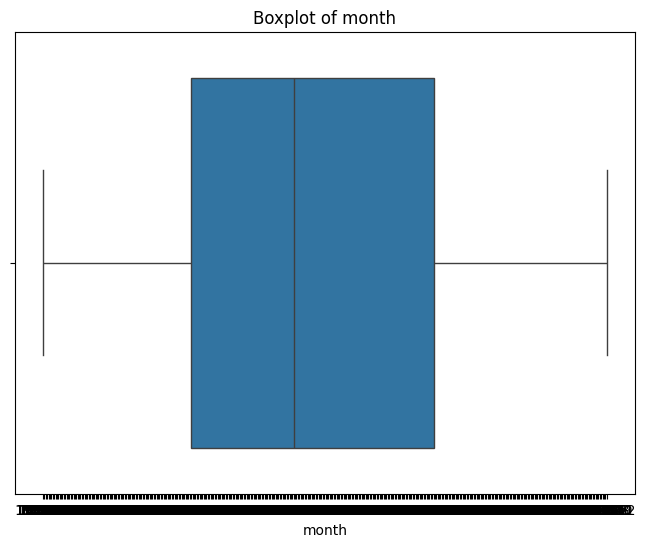

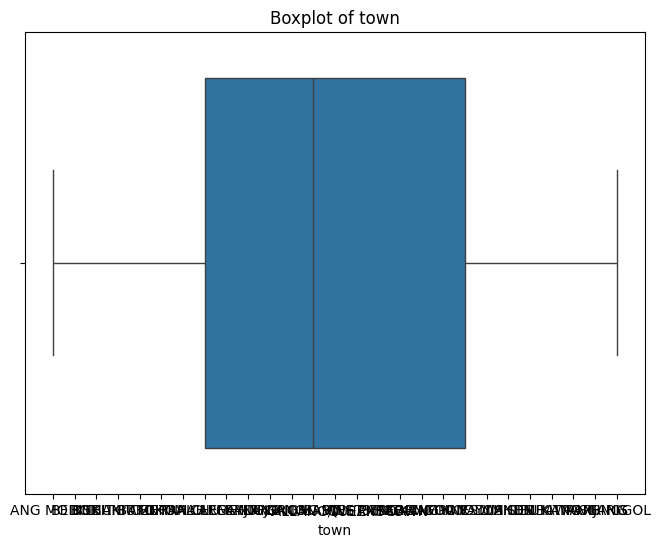

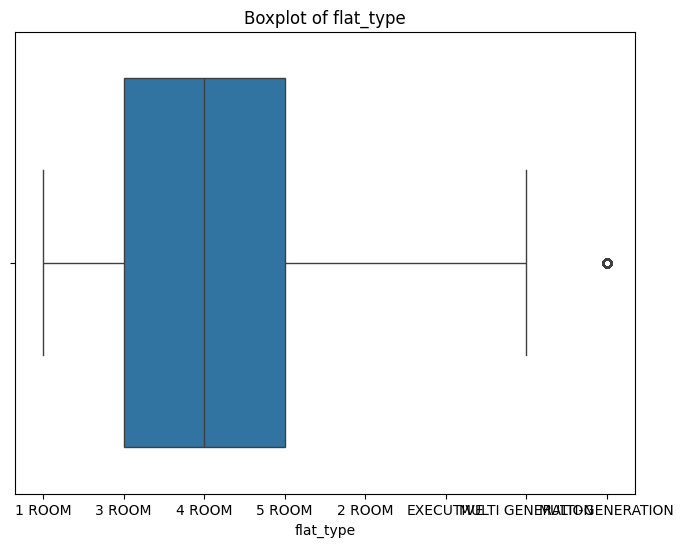

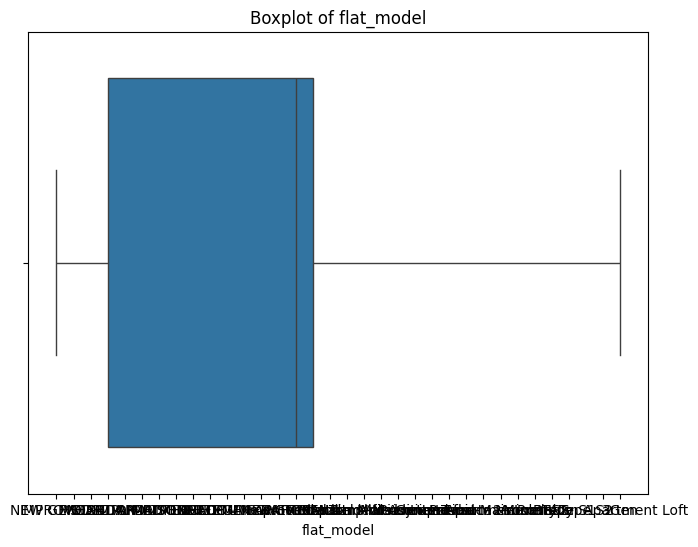

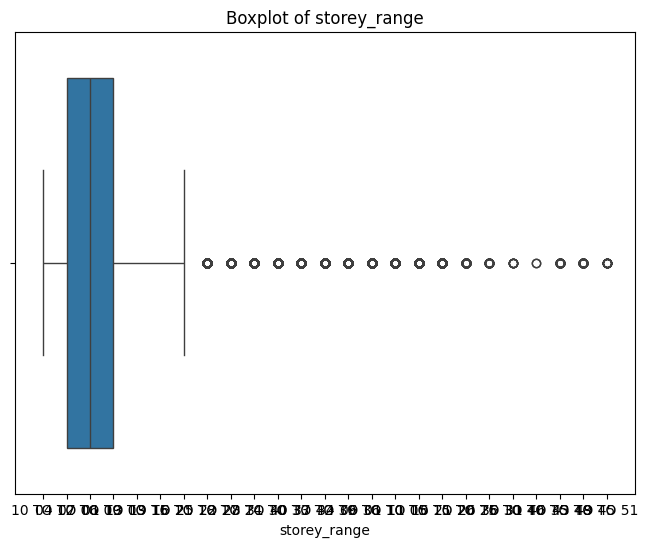

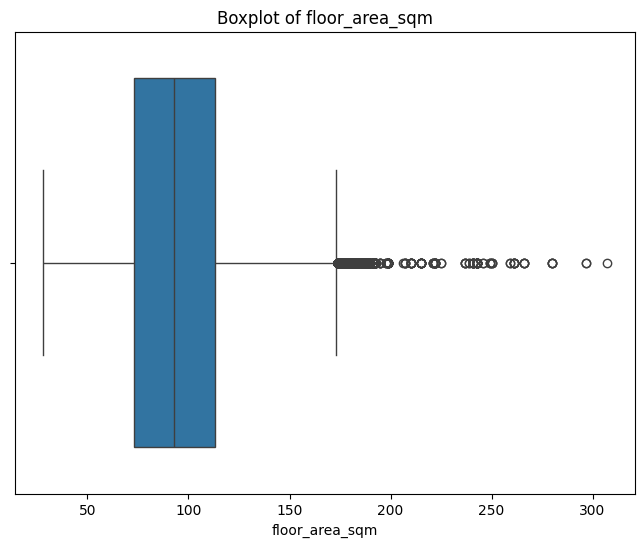

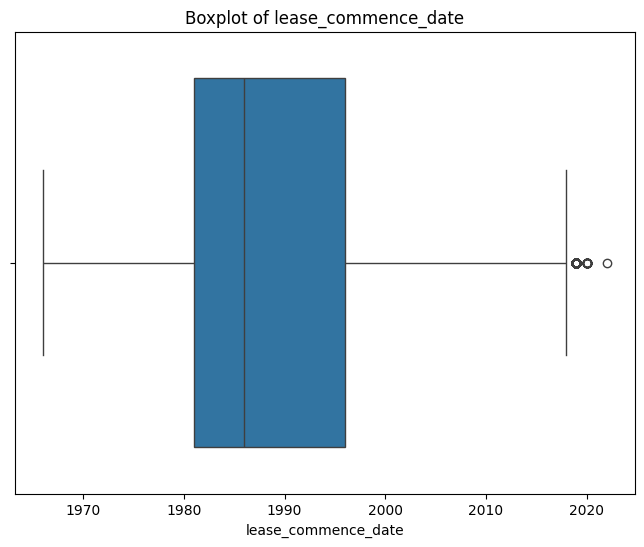

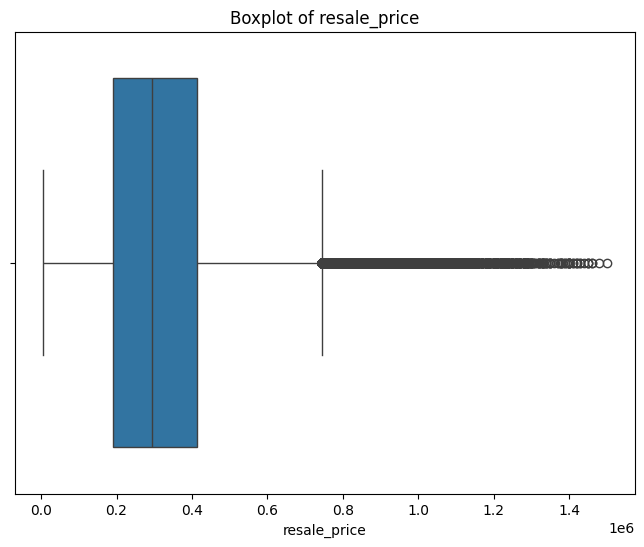

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['month','town','flat_type','flat_model','storey_range','floor_area_sqm','lease_commence_date','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

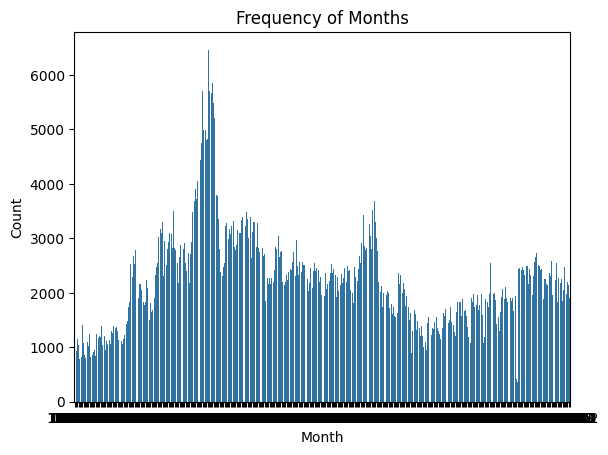

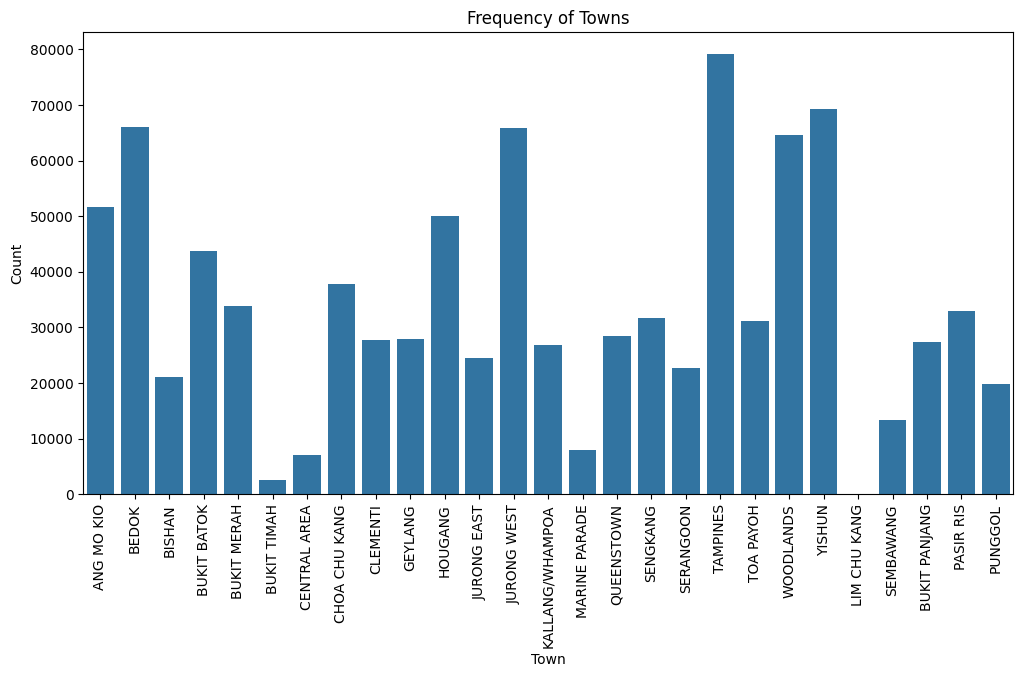

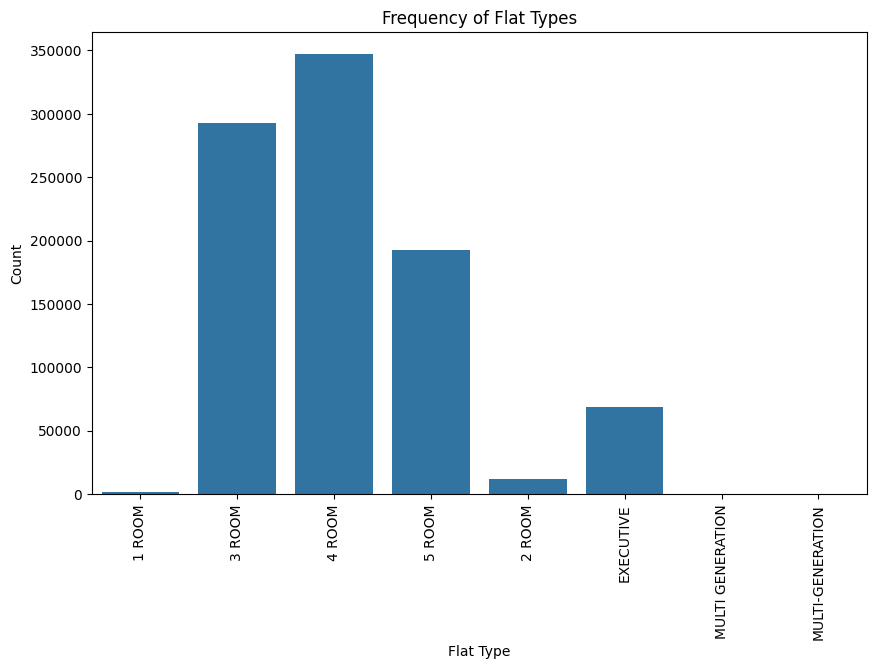

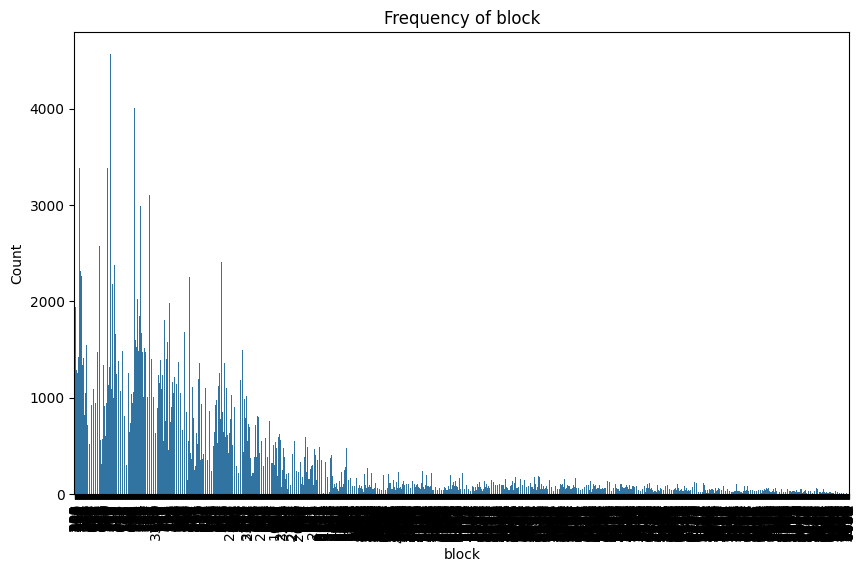

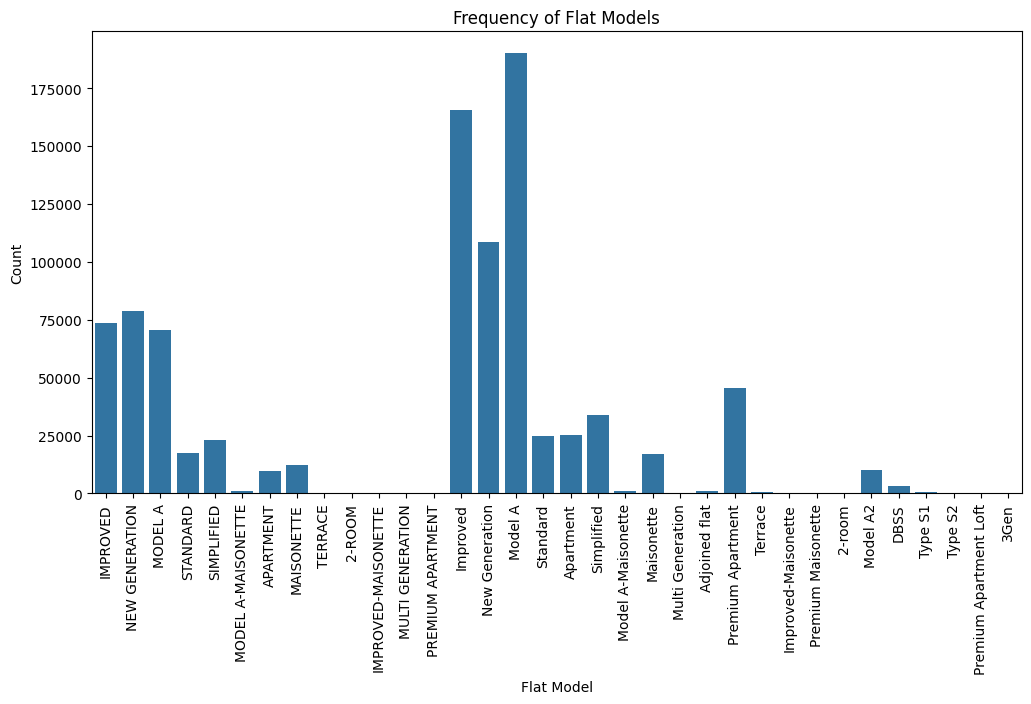

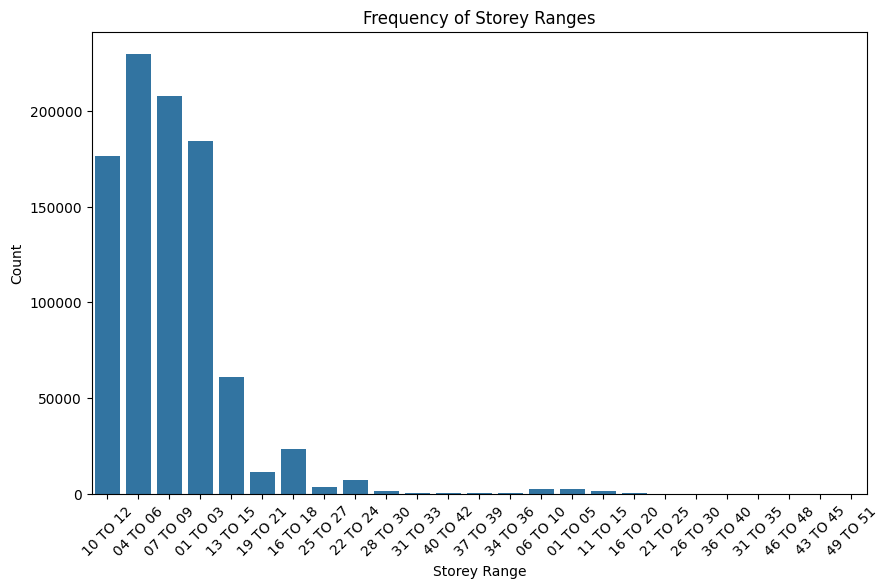

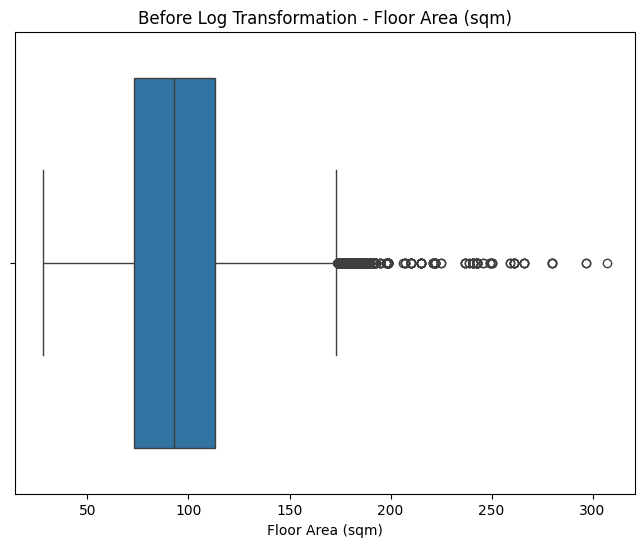

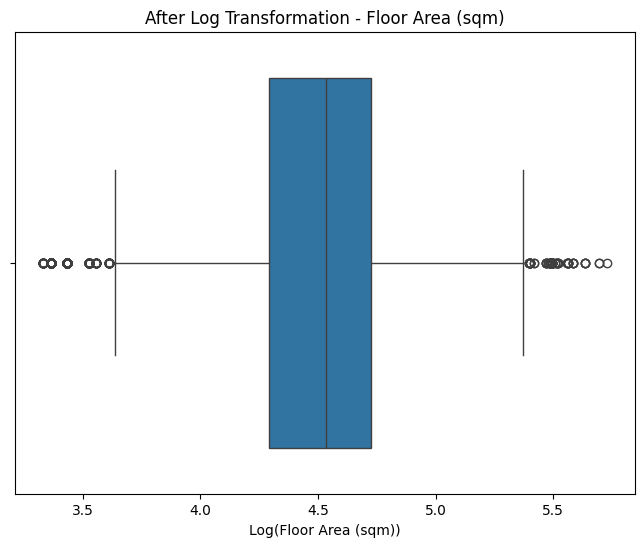

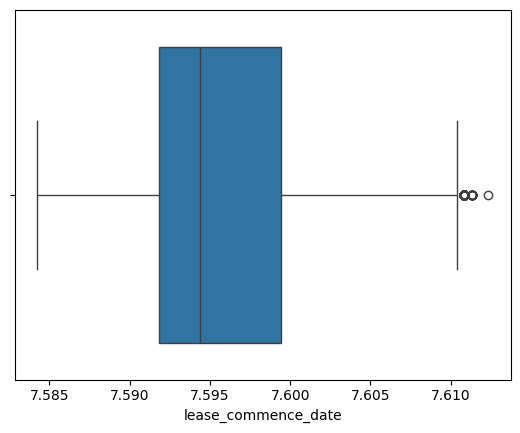

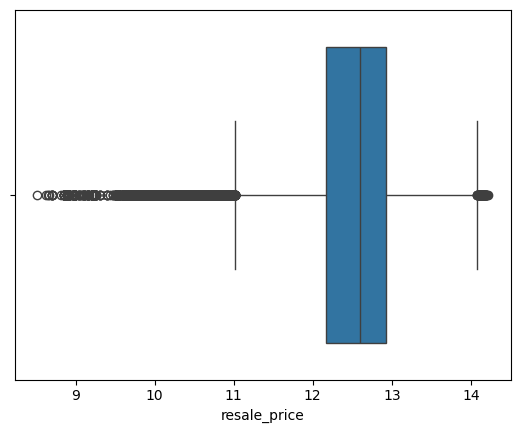

In [18]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
 
sns.countplot(x='month', data=df)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Frequency of Months')
plt.show()

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='town', data=df)
plt.xlabel('Town')
plt.ylabel('Count')
plt.title('Frequency of Towns')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if needed
plt.show()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='flat_type', data=df)
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.title('Frequency of Flat Types')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if needed
plt.show()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='block', data=df)
plt.xlabel('block')
plt.ylabel('Count')
plt.title('Frequency of block')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if needed
plt.show()

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='flat_model', data=df)
plt.xlabel('Flat Model')
plt.ylabel('Count')
plt.title('Frequency of Flat Models')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if needed
plt.show()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='storey_range', data=df)
plt.xlabel('Storey Range')
plt.ylabel('Count')
plt.title('Frequency of Storey Ranges')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='floor_area_sqm', data=df)
plt.title('Before Log Transformation - Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.show()

# Applying logarithmic transformation
df['floor_area_sqm'] = np.log(df['floor_area_sqm'])

# After logarithmic transformation
plt.figure(figsize=(8, 6))
sns.boxplot(x='floor_area_sqm', data=df)
plt.title('After Log Transformation - Floor Area (sqm)')
plt.xlabel('Log(Floor Area (sqm))')
plt.show()


df['lease_commence_date'] = np.log(df['lease_commence_date'] + 1)  # Adding 1 to avoid log(0)
sns.boxplot(x='lease_commence_date', data=df)
plt.show()

df['resale_price'] = np.log(df['resale_price'])
sns.boxplot(x='resale_price', data=df)
plt.show()

In [19]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date    float64
resale_price           float64
address                 object
dtype: object

# Visualization among different columns using Correlation Matrix

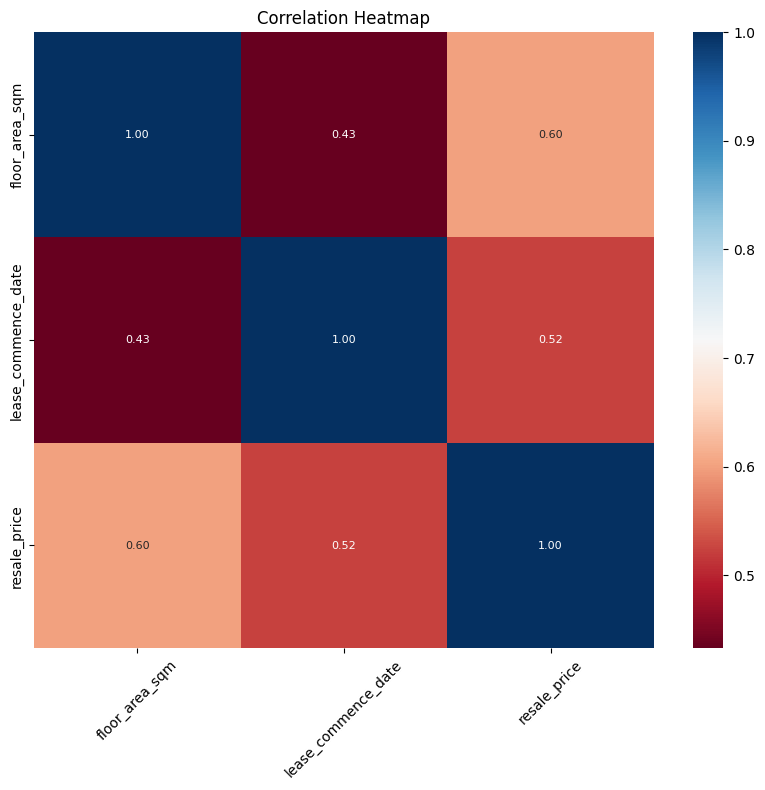

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
corrMatrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corrMatrix, 
    annot=True,
    cmap='RdBu', 
    fmt='.2f',
    annot_kws={"size": 8},
)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()


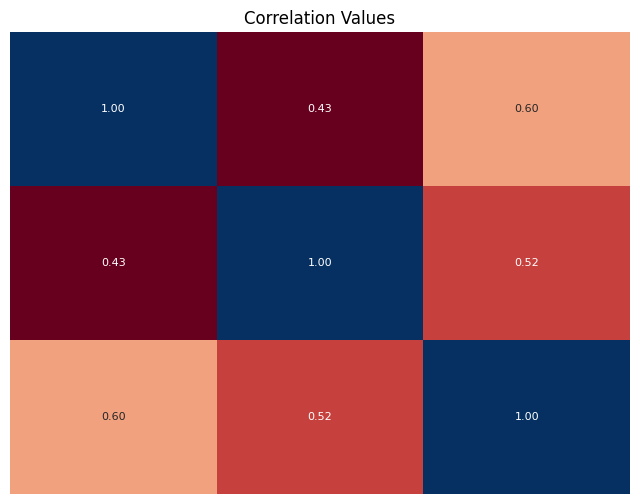

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corrMatrix, 
    annot=True,
    cmap='RdBu', 
    fmt='.2f',
    annot_kws={"size": 8},
    cbar=False,
)
plt.title("Correlation Values")
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.show()


# Encoding Data

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the relevant columns

# Label encoding categorical columns
label_encoder = LabelEncoder()

df['storey_range_encoded'] = label_encoder.fit_transform(df['storey_range'])
df['month_encoded'] = label_encoder.fit_transform(df['month'])
df['block_encoded'] = label_encoder.fit_transform(df['block'])
df['flat_type_encoded'] = label_encoder.fit_transform(df['flat_type'])
df['town_encoded'] = label_encoder.fit_transform(df['town'])

# Selecting columns for scaling
selected_cols = ['town_encoded', 'flat_type_encoded', 'block_encoded', 'month_encoded', 'storey_range_encoded', 'floor_area_sqm', 'lease_commence_date']

# Separating the selected columns
X = df[selected_cols].values
y = df['resale_price'].values

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [23]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4,5,6
0,0.0,0.0,829.0,0.0,5.0,3.433987,7.589842
1,0.0,0.0,829.0,0.0,2.0,3.433987,7.589842
2,0.0,0.0,829.0,0.0,5.0,3.433987,7.589842
3,0.0,0.0,829.0,0.0,4.0,3.433987,7.589842
4,0.0,2.0,447.0,0.0,2.0,4.290459,7.589336
...,...,...,...,...,...,...,...
915269,26.0,5.0,1861.0,407.0,5.0,4.983607,7.594884
915270,26.0,5.0,1861.0,407.0,5.0,4.955827,7.594884
915271,26.0,5.0,2360.0,407.0,0.0,4.955827,7.595387
915272,26.0,5.0,2373.0,407.0,0.0,4.955827,7.595387


# Splitting the Data for Training and Testing Purposes

In [24]:
from sklearn.model_selection import train_test_split


# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor and Testing Our Trained Model (Decision Tree Regressor)¶

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=7)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
 
Mean squared error: 0.011151848122388182
Mean Absolute Error 0.07350628635370164
Root Mean squared error: 0.10560231116025909
 
R-squared: 0.9698925288028745


In [29]:
# Replace placeholders with actual values
town_encoded_value = 8740
flat_type_encoded_value = 999
block_encoded_value = np.log(44)
month_encoded_value = 55
storey_range_encoded_value = np.log(11)
floor_area_sqm_value = 80 
lease_commence_date_value = 1995  

# Create a new sample array with the same number of features as 'selected_cols'
new_sample = np.array([[town_encoded_value, flat_type_encoded_value, block_encoded_value, month_encoded_value, storey_range_encoded_value, floor_area_sqm_value, lease_commence_date_value]])

# Transform the new sample using the scaler
new_sample_normalized = scaler.transform(new_sample)

# Predict using the best model
new_pred = best_model.predict(new_sample_normalized)

# Convert the predicted value back to the original scale if needed
predicted_price = np.exp(new_pred)


In [30]:
predicted_price

array([196542.4305579])

# Saving the model

In [31]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
